In [42]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

im = Image.open("./train_data/walkable_mask.png")

walkable_mask = np.asarray(im, dtype=bool) == 0

In [43]:
# Load training_walks.csv
training_walks = pd.read_csv("./train_data/training_walks.csv")

print(training_walks.shape)
training_walks.head()


(3200000, 8)


,id,transmitter,walk,i,j,rssi,tx_location_i,tx_location_j
0,0,tx0,0,2214,1812,-1000.0,1716,1337
1,1,tx0,0,2214,1807,-1000.0,1716,1337
2,2,tx0,0,2219,1807,-1000.0,1716,1337
3,3,tx0,0,2222,1807,-1000.0,1716,1337
4,4,tx0,0,2222,1802,-1000.0,1716,1337


In [44]:
only_tx0 = training_walks[training_walks["transmitter"] == "tx0"]
# filter all rssi values less than -400
only_tx0 = only_tx0[only_tx0["rssi"] > -400]

only_tx0.shape

(99053, 8)

(-241.76564, -62.68087)


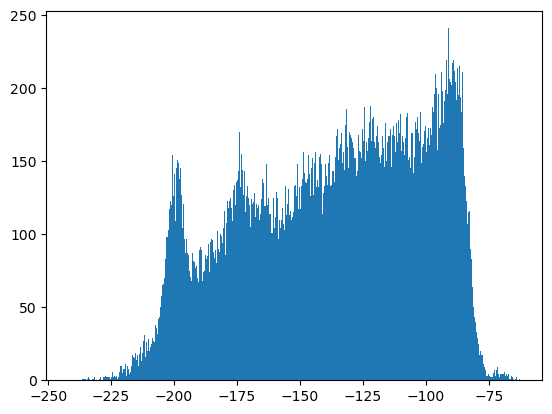

In [45]:
rssi_min_max = only_tx0["rssi"].min(), only_tx0["rssi"].max()

print(rssi_min_max)

# plot the histogram of the rssi values
plt.hist(only_tx0["rssi"], bins=1000)
plt.show()

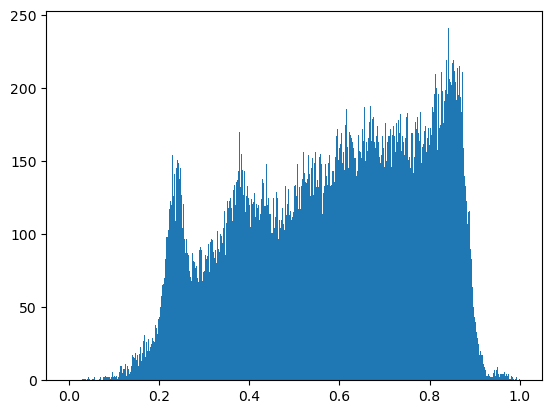

In [46]:
# Rescale the rssi values to be between 0 and 1
only_tx0["rssi"] = (only_tx0["rssi"] - rssi_min_max[0]) / (rssi_min_max[1] - rssi_min_max[0])

# plot the histogram of the rssi values
plt.hist(only_tx0["rssi"], bins=1000)
plt.show()


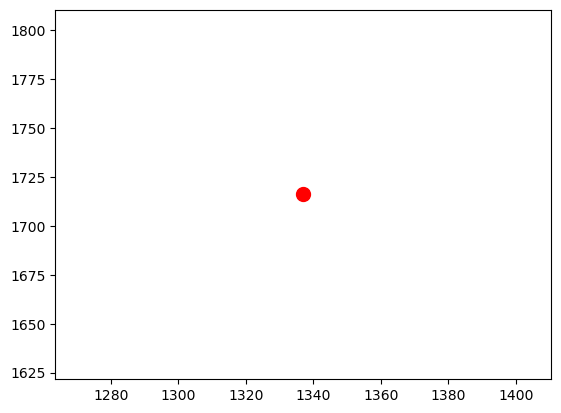

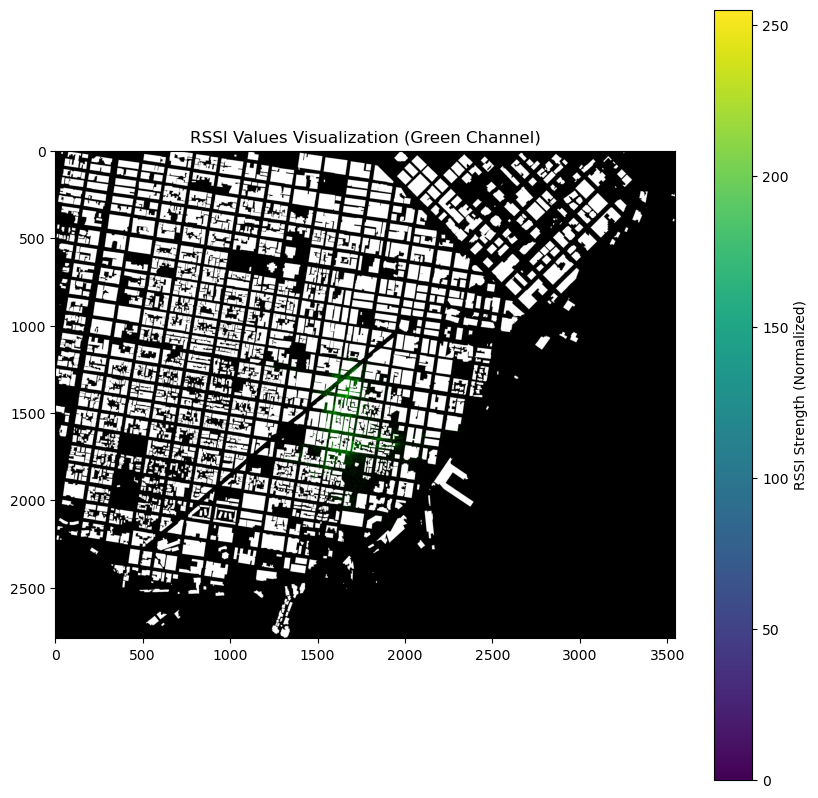

In [ ]:
# Create a copy of the walkable mask to visualize the RSSI values
rssi_map = np.zeros((walkable_mask.shape[0], walkable_mask.shape[1], 3), dtype=np.uint8)

# Set the background to white
rssi_map[walkable_mask] = [255, 255, 255]  # White for walkable areas
rssi_map[~walkable_mask] = [0, 0, 0]       # Black for non-walkable areas

# Update the green channel based on RSSI values
for _, row in only_tx0.iterrows():
    i, j, rssi = int(row['i']), int(row['j']), row['rssi']
    
    # Ensure i and j are within the bounds of the map
    if 0 <= i < rssi_map.shape[0] and 0 <= j < rssi_map.shape[1]:
        # Set the green channel based on RSSI value (keeping red and blue at 0)
        green_value = int(255 * rssi)
        rssi_map[j, i] = [0, green_value, 0]  # Only update the green channel

# Every value has a transmitter location named tx_location_i and tx_location_j
# Get the first row of only_tx0 and plot the tx_location_i and tx_location_j on the map
tx_location_i = only_tx0.iloc[0]['tx_location_i']
tx_location_j = only_tx0.iloc[0]['tx_location_j']

# plot the tx_location_i and tx_location_j on the map
# Make it a red circle 100 pixels in diameter
plt.scatter(tx_location_j, tx_location_i, color='red', marker='o', s=500)

# save the new colored map to a png file
plt.imsave("./train_data/rssi_map.png", rssi_map)

# Display the RSSI map
plt.figure(figsize=(10, 10))
plt.imshow(rssi_map)
plt.title('RSSI Values Visualization (Green Channel)')
plt.colorbar(label='RSSI Strength (Normalized)')
plt.show()
